In [1]:
#Import data latih angka hingga siap olah 
import numpy as np
from keras.datasets import mnist
(x_num_trn, y_num_trn),(x_num_test, y_num_test)= mnist.load_data()
x_num_all = np.append(x_num_trn,x_num_test,axis=0)
x_num_all = x_num_all.reshape(70000,784)
y_num_all = np.append(y_num_trn,y_num_test,axis=0)

Using TensorFlow backend.


In [2]:
#Import data latih huruf(A-J) hingga siap olah
from emnist import extract_training_samples, extract_test_samples
x_alp_trn, y_alp_trn = extract_training_samples('letters')
x_alp_test, y_alp_test = extract_test_samples('letters')
x_alp_trn = np.array(x_alp_trn[np.argwhere(y_alp_trn<=10),:,:])
x_alp_trn = np.squeeze(x_alp_trn, axis = 1)
y_alp_trn = np.array(y_alp_trn[np.argwhere(y_alp_trn<=10)]) + 9
y_alp_trn = np.squeeze(y_alp_trn, axis = 1)
x_alp_test = np.array(x_alp_test[np.argwhere(y_alp_test<=10),:,:])
x_alp_test = np.squeeze(x_alp_test, axis = 1)
y_alp_test = np.array(y_alp_test[np.argwhere(y_alp_test<=10)]) + 9
y_alp_test = np.squeeze(y_alp_test, axis = 1)
x_alp_all = np.append(x_alp_trn,x_alp_test,axis=0)
x_alp_all = x_alp_all.reshape(56000,784)
y_alp_all = np.append(y_alp_trn,y_alp_test,axis=0)

In [3]:
#Data gabungan angka dan huruf
x_all = np.append(x_num_all,x_alp_all,axis=0)
y_all = np.append(y_num_all,y_alp_all,axis=0)

In [4]:
#Train data angka dan huruf siap olah dengan menggunakan metode Random Forest
from sklearn.ensemble import RandomForestClassifier
rnd_frs_all_clf = RandomForestClassifier()
rnd_frs_all_clf.fit(x_all, y_all)

C:\Users\MShafwanF\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [5]:
#Cross Validation data gabungan
from sklearn.model_selection import cross_val_score
val_all_scr_rnd_frs = cross_val_score(rnd_frs_all_clf, x_all, y_all, cv=5) 
total_all_rnd_frs = 0
for i in range(len(val_all_scr_rnd_frs)):
    total_all_rnd_frs = total_all_rnd_frs + val_all_scr_rnd_frs[i]
mean_cross_val_all_scr_rnd_frs = total_all_rnd_frs/len(val_all_scr_rnd_frs)
print("Mean validation score huruf RandomForest = ", mean_cross_val_all_scr_rnd_frs)

Mean validation score huruf RandomForest =  0.9147539610399427


In [6]:
#Pengolahan data input
from PIL import ImageOps as IO
from numpy import asarray
def fix_data(data_input):
  width, height = data_input.size
  left = 0.1*width
  top = 0.1*height
  right = 0.9*width
  bottom = 0.9*height
  cropped_data = data_input.crop((left, top, right, bottom))
  GS_data = IO.grayscale(cropped_data)
  inv_data = IO.invert(GS_data)
  rsz_data = inv_data.resize((28,28))
  fixed_data = asarray(rsz_data)
  return fixed_data

In [7]:
#Import data input
from os import listdir
from PIL import Image
datasets_test = "image-crop"
list_data = listdir(datasets_test)
data_gmb = []
for nama in list_data:
  data_img = Image.open(datasets_test + "/" + nama)
  data_img = fix_data(data_img)
  data_gmb.append(data_img)
data_gmb = asarray(data_gmb)

In [8]:
#Prediksi output gambar
data_gmb = data_gmb.reshape(5520,784)
pred_gmb_rnd_frs_all_clf = []
for i in range(len(data_gmb)):
    pred_out_gmb = rnd_frs_all_clf.predict([data_gmb[i]])
    pred_gmb_rnd_frs_all_clf.append(pred_out_gmb)

In [9]:
#Membuat file prediksi gambar
import pandas as pd
import xlsxwriter as xw
data = pd.read_csv('format-prediksi-submit.csv')
wb = xw.Workbook('prediksi-submit.xlsx')
ws = wb.add_worksheet('Jawaban Gambar')
huruf = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
head_table = ['image_filename', 'output']
for i in range(len(head_table)):
    ws.write(0,i,head_table[i])
prediction = pred_gmb_rnd_frs_all_clf
for i in range(len(prediction)):
    if prediction[i]<10:
        jawaban = int(prediction[i])
    else:
        code_huruf = prediction[i] - 10
        jawaban = huruf[int(code_huruf)]
    ws.write((i+1),1,jawaban)
    ws.write((i+1),0,str(data.iloc[i,0]))
wb.close()

Text(0, 0.5, 't-SNE feature 1')

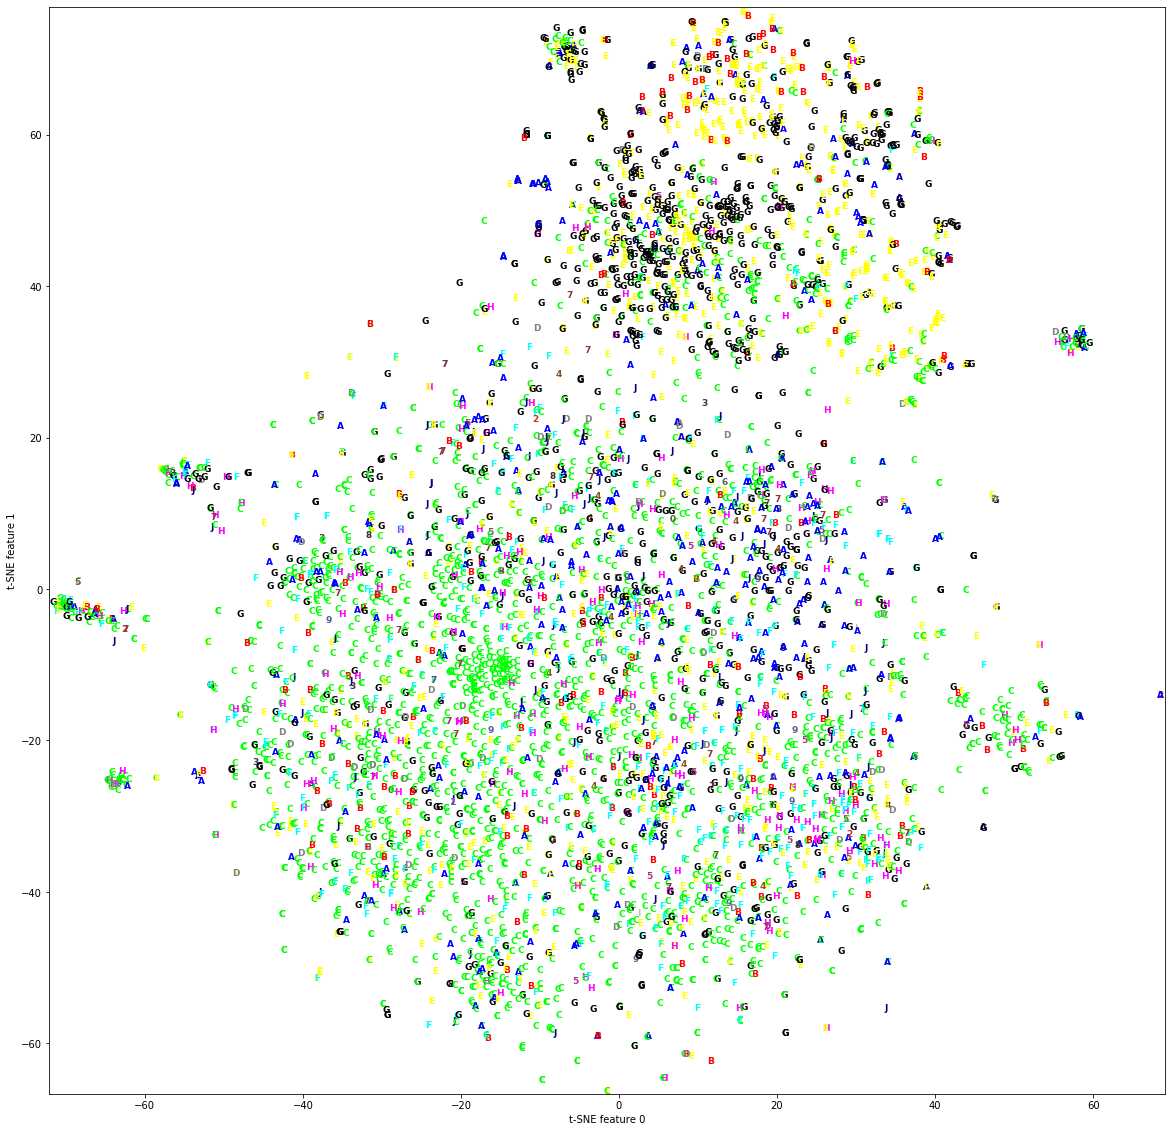

In [12]:
#Visualisasi data T-SNE data uji
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
data_jawaban = pd.read_excel('prediksi-submit.xlsx')
tsne = TSNE()
digits_tsne = tsne.fit_transform(data_gmb)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E", "#0000FF", "#FF0000", "#00FF00", "#808080","#FFFF00", "#00FFFF", "#000000", "#FF00FF", "#C0C0C0", "#000080"]
plt.figure(figsize=(20, 20))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(data_jawaban)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(data_jawaban.iloc[i,1]), color = colors[int(prediction[i])], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

Text(0, 0.5, 't-SNE feature 1')

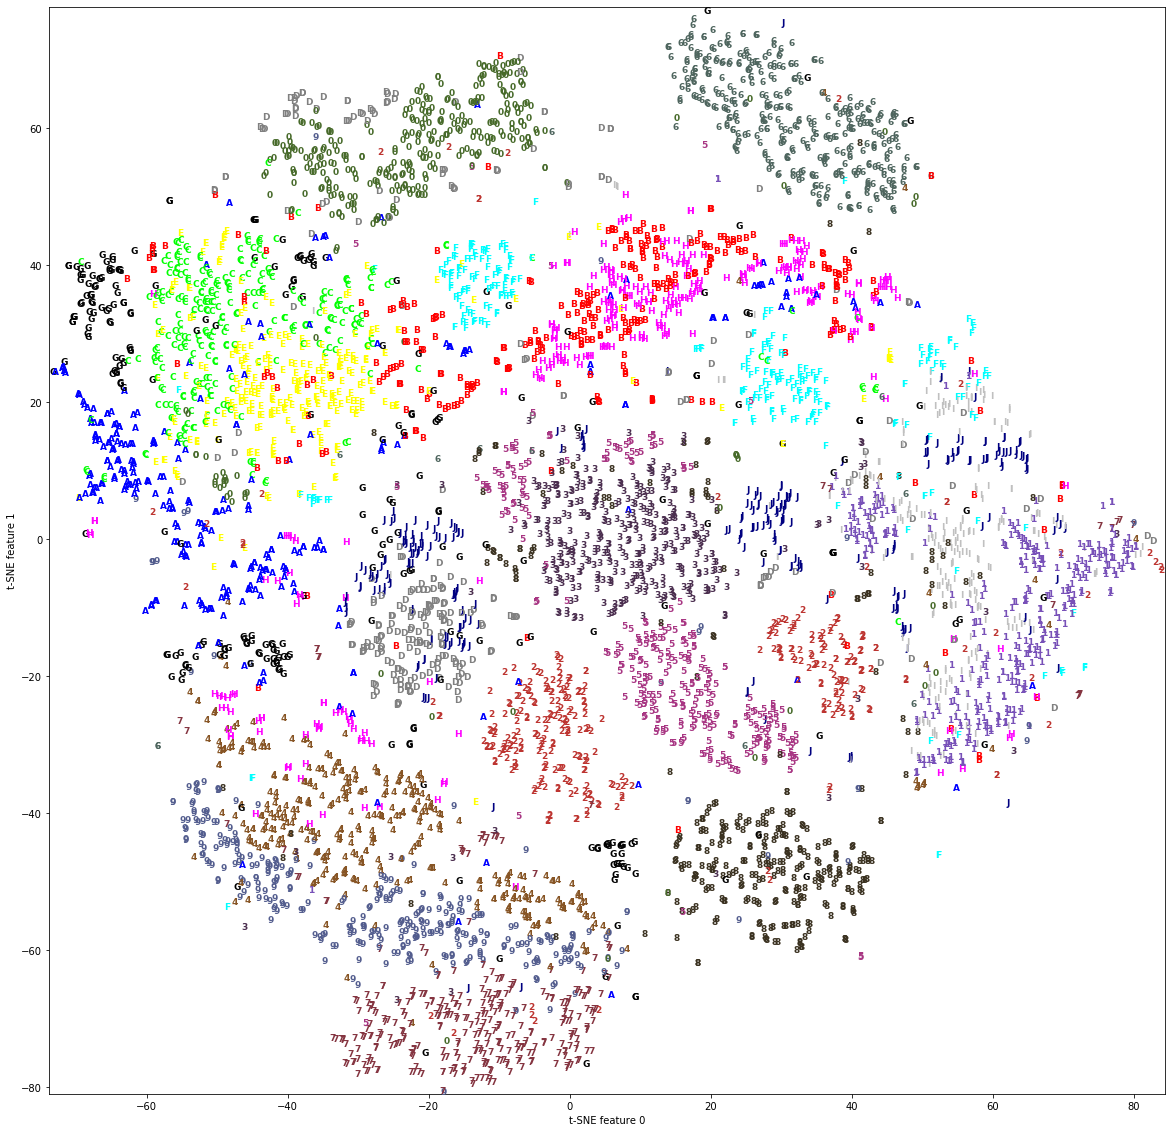

In [11]:
#Visualisasi 5% data MNIST
from sklearn.model_selection import train_test_split
x_95_all, x_05_all, y_95_all, y_05_all = train_test_split(x_all, y_all, test_size=0.05)
y_05_all_combination = []
for i in range(len(y_05_all)):
    if y_05_all[i]<10:
        jawaban = int(y_05_all[i])
    else:
        code_huruf = y_05_all[i] - 10
        jawaban = huruf[int(code_huruf)]
    y_05_all_combination.append(jawaban)
digits_tsne = tsne.fit_transform(x_05_all)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E", "#0000FF", "#FF0000", "#00FF00", "#808080","#FFFF00", "#00FFFF", "#000000", "#FF00FF", "#C0C0C0", "#000080"]
plt.figure(figsize=(20, 20))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(x_05_all)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(y_05_all_combination[i]), color = colors[y_05_all[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")